# Práctica 6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
print('Observación: El feature total_bedrooms no tiene '+str(20640-20433)+' valores.')

Observación: El feature total_bedrooms no tiene 207 valores.


In [6]:
#Atributo categórico
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


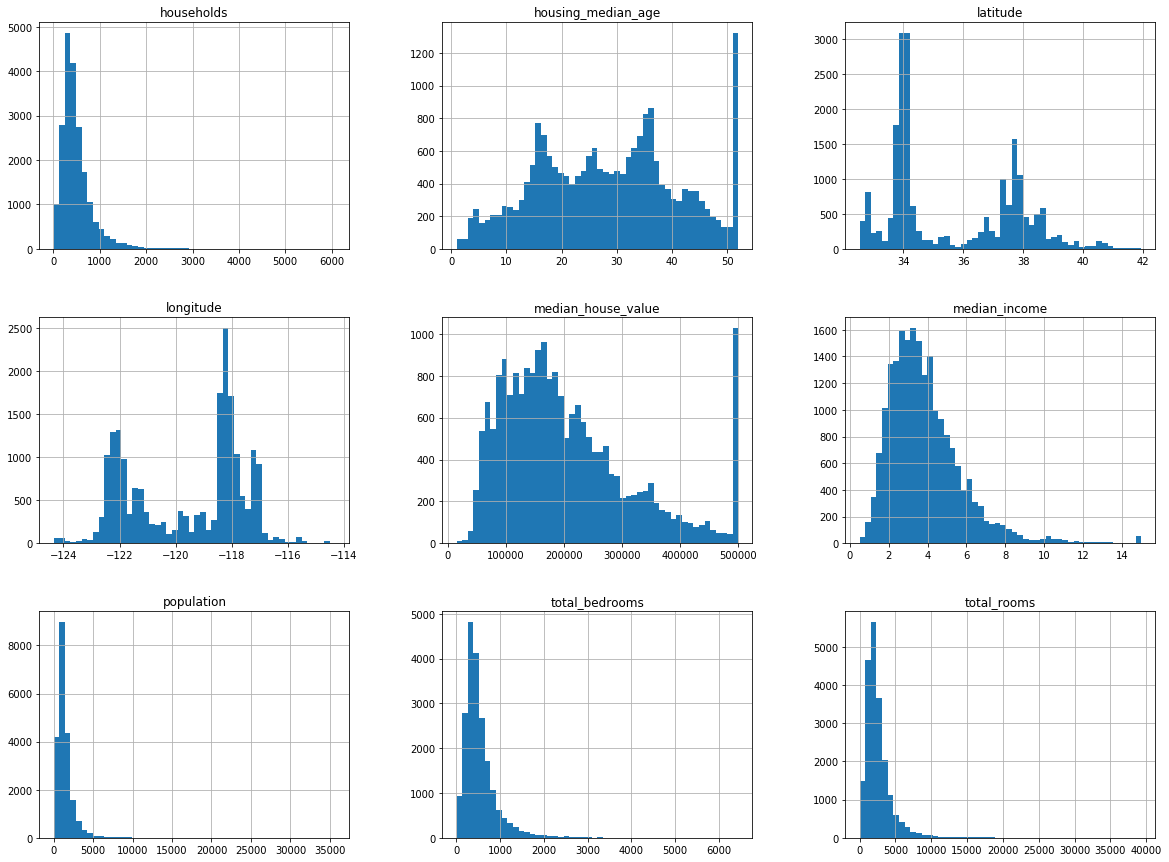

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Creamos un conjunto de prueba (test set)

In [9]:
def split_train_test(data, test_ratio):
     shuffled_indices = np.random.permutation(len(data))
     test_set_size = int(len(data) * test_ratio)
     test_indices = shuffled_indices[:test_set_size]
     train_indices = shuffled_indices[test_set_size:]
     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

No sirve muy bien porque se definirá un nuevo dataset cuando corramos de nuevo el código. La siguiente función nos dará un train set con 20% de las nuevas instancias pero no contendrá ninguna instancia que haya estado previamente en el train set.

In [13]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
    
def split_train_test_by_id(data, test_ratio, id_column):
     ids = data[id_column]
     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
     return data.loc[~in_test_set], data.loc[in_test_set]

Como housing no tiene llaves únicas, usamos el índice asignado.

In [14]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Usamos como ID único latitud y longitud.

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Usamos sklearn para generar test set

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

El ingreso medio es importante, en el plot podemos observar que no tenemos muchos estratos, creamos nueva variable que contempla 5 cateogrías.

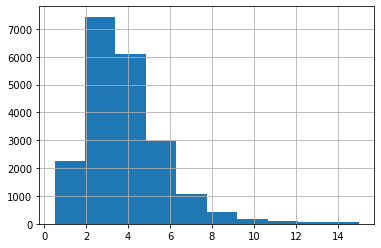

In [17]:
housing.median_income.hist()
plt.show()

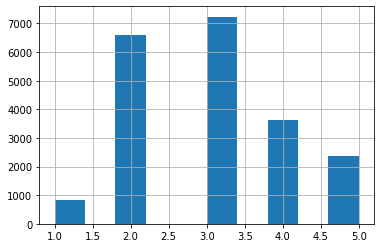

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
plt.show()

Ahora tomamos una muestra con la nueva variable para contemplar mejor a la población

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Comparación general, con muestreo estratificado y muestreo aleatorio.

In [20]:
General=(housing["income_cat"].value_counts() / len(housing)).sort_index(axis=0)


train_set["income_cat"] = pd.cut(train_set["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
Muest_Al = (train_set["income_cat"].value_counts() / len(train_set)).sort_index(axis=0)

Muest_Est = (strat_test_set["income_cat"].value_counts() / len(strat_test_set)).sort_index(axis=0)

Al_Error = 100* General/Muest_Al -100
Est_Error = 100*General/Muest_Est -100

<ipython-input-20-954b96966665>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["income_cat"] = pd.cut(train_set["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])


In [21]:
pd.DataFrame({'Overall': General, 'Random': Muest_Est, 'Stratified': Muest_Al, 'Rnad. %error': Al_Error, 'Strat. %error': Est_Error})

,Overall,Random,Stratified,Rnad. %error,Strat. %error
1,0.039826,0.039729,0.039729,0.243902,0.243902
2,0.318847,0.318798,0.317466,0.434948,0.015198
3,0.350581,0.350533,0.348595,0.569840,0.013822
4,0.176308,0.176357,0.178537,-1.248304,-0.027473
5,0.114438,0.114583,0.115673,-1.068063,-0.126850


Removemos income_cat

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Descubrimiento y visualización de los datos para obtener información

Creamos una copia del train set para no modificar el original.

In [23]:
housing = strat_train_set.copy()

### Visualización de datos geográficos

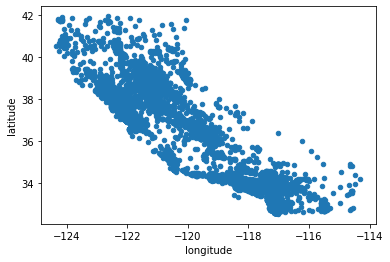

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

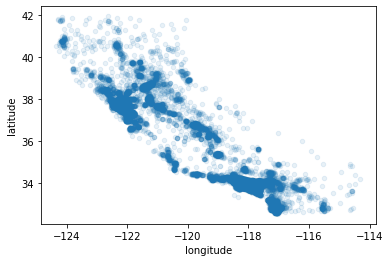

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

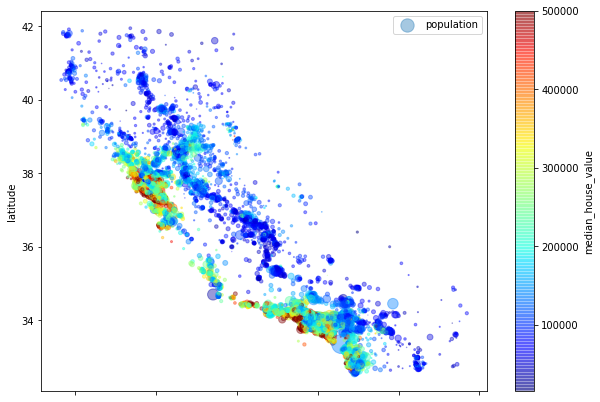

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", 
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

### En busca de correlaciones

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

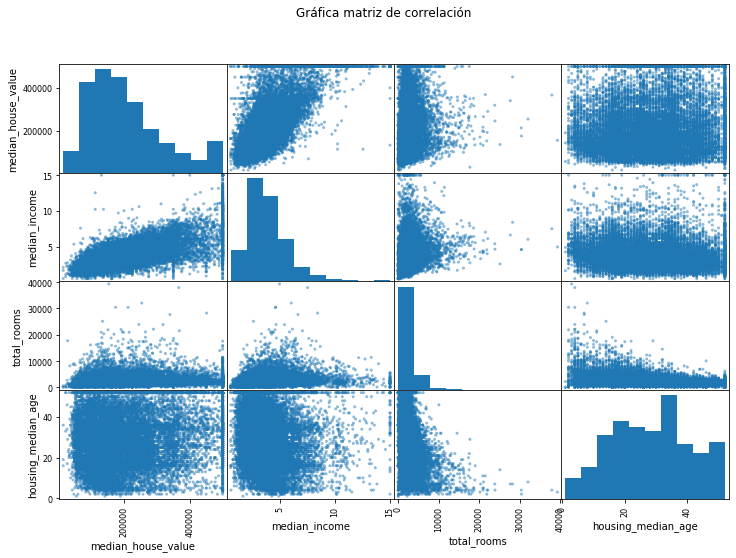

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.suptitle('Gráfica matriz de correlación')

plt.show()

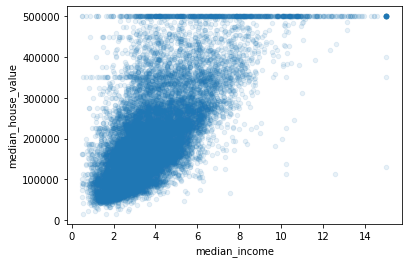

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

El número de baños  por cuarto muestra más correlación que el total de cuartos y total de baños por sí mismo.

### Preparación de los datos para algoritmos de aprendizaje automático

In [32]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Limpieza de datos

Llenar valores nulos con la mediana.

In [33]:
housing.dropna(subset=["total_bedrooms"]) 
housing.drop("total_bedrooms", axis=1) 
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

Con skitlearn-SimpleInputer

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [35]:
#Quitamos esta variable categórica
housing_num = housing.drop("ocean_proximity", axis=1)

In [36]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
imputer.statistics_ == housing_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [40]:
X = imputer.transform(housing_num)

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


### Manejo de texto y atributos categóricos

In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Usamos Scikit-Learn’s OrdinalEncoder class

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [44]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Ahora usamos on-hot encoding, es una matriz dispersa que guarda las locaciones de los números que son distintos de cero.

In [46]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Lo podemos convertir a arreglo.

In [47]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Transformadores personalizados

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

pd.DataFrame(housing_extra_attribs, columns=[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 
                                              'population', 'households', 'median_income','ocean_proximity', 'rooms_per_household', 
                                              'population_per_household']])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46,1271,236,573,210,4.9312,INLAND,6.05238,2.72857
16508,-117.56,33.88,40,1196,294,1052,258,2.0682,INLAND,4.63566,4.07752
16509,-116.4,34.09,9,4855,872,2098,765,3.2723,INLAND,6.34641,2.74248
16510,-118.01,33.82,31,1960,380,1356,356,4.0625,<1H OCEAN,5.50562,3.80899


### Pipelines de transformación

Pipeline para variables numéricas.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Pipeline que junta las transformaciones correspondientes a las varaibles categóricas y numéricas.

In [51]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

## Selección y entrenamiento de un modelo
### Entrenamiento y evaluación en el conjunto de entrenamiento

Modelo de regresión lineal

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Probamos con árboles de decisión porque, al parecer, nuestro modelo no generaliza y no está bien ajustado.

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Mejor evaluación con validación cruzada

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Score para el árbol de decisión.

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69281.59256306 66477.75471599 72182.10668454 69474.69132967
 70864.81102319 75573.64186942 70593.55483192 71550.29091587
 77006.35941893 71521.82013106]
Mean: 71452.66234836582
Standard deviation: 2878.0493525933002


Score para la regresión lineal.

In [59]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


Hacemos la prueba con un tercer modelo: random forest regressor.

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [61]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

### Ajustando el modelo

Busqueda Grid

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 
                                                                            'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [63]:
#Los mejores paramétros
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [64]:
#El mejor estimador
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Analizando los mejores modelos y sus errores.

In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.03020743e-02, 6.15011364e-02, 4.43588941e-02, 1.57685754e-02,
       1.44768887e-02, 1.47329508e-02, 1.45077824e-02, 3.96597543e-01,
       4.30358774e-02, 1.10996372e-01, 4.45043504e-02, 6.98773697e-03,
       1.55790146e-01, 1.51658499e-04, 2.86637587e-03, 3.42163800e-03])

In [66]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.39659754292547084, 'median_income'),
 (0.15579014600535537, 'INLAND'),
 (0.11099637171943445, 'pop_per_hhold'),
 (0.07030207429940344, 'longitude'),
 (0.06150113642363565, 'latitude'),
 (0.044504350439221955, 'bedrooms_per_room'),
 (0.04435889409823298, 'housing_median_age'),
 (0.04303587742019352, 'rooms_per_hhold'),
 (0.015768575434277284, 'total_rooms'),
 (0.014732950783354952, 'population'),
 (0.014507782446421482, 'households'),
 (0.014476888662802034, 'total_bedrooms'),
 (0.006987736972217435, '<1H OCEAN'),
 (0.003421638004005626, 'NEAR OCEAN'),
 (0.0028663758672130353, 'NEAR BAY'),
 (0.00015165849875985776, 'ISLAND')]

### Evaluando el sistema en el conjunto de prueba

In [67]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

In [68]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45601.11194315, 49504.9498738 ])

Aquí empieza la práctica 6

# 1. Proponer 3 métodos de transformación de variables numéricas y 3 métodos de transformación de variables categóricas, y compara en una tabla la el desempeño de los 6 modelos distintos generados por el mismo método de aprendizaje automático (algoritmo). 

# Primera transformación

### A la variable ocean_proximity usando label encoding

In [69]:
housing1 = housing.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(housing1["ocean_proximity"])
housing1['ocean_proximity_LE'] = le.transform(housing1["ocean_proximity"])
housing1 = housing1.drop(columns=['ocean_proximity'])
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_LE
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0


In [70]:
housing1_prepared = housing1.to_numpy()

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing1_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing1_predictions = tree_reg.predict(housing1_prepared)
tree_mse = mean_squared_error(housing_labels, housing1_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [71]:
# Mejor evaluación con validación cruzada

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing1_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Score para el árbol de decisión

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [65162.50424402 70096.2249801  69334.17802439 72977.32719049
 67669.24371741 73731.98199829 68661.29724928 69422.64217585
 70976.83810567 70188.20383196]
Mean: 69822.04415174479
Standard deviation: 2342.5830329447026


# Segunda transformación

### A la variable ocean_proximity usando codificación binaria

In [72]:
housing2 = housing.copy()

from category_encoders import BinaryEncoder

be = BinaryEncoder()
housing2_be = be.fit_transform(housing2['ocean_proximity'])
housing2 = housing2.drop(columns=['ocean_proximity'])
housing2 = pd.concat([housing2,housing2_be],axis=1)

housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0,0,0,1
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0,0,0,1
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0,0,1,0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0,0,1,1
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0,0,0,1


In [73]:
housing2_prepared = housing2.to_numpy()

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing2_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing2_predictions = tree_reg.predict(housing2_prepared)
tree_mse = mean_squared_error(housing_labels, housing2_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [74]:
# Mejor evaluación con validación cruzada

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing2_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Score para el árbol de decisión.

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69549.4596749  70476.74502892 70097.45267063 71064.80630224
 68186.16845388 72340.24462922 71694.86797734 71912.92477553
 71036.48602649 71514.78939468]
Mean: 70787.39449338279
Standard deviation: 1184.9539933034673


# Tercera transformación

### A la variable ocean_proximity usando codificación de frencuencias

In [75]:
housing3 = housing.copy()

freq = housing3['ocean_proximity'].value_counts()
housing3['ocean_proximity_fe'] = housing3['ocean_proximity'].map(freq)
housing3 = housing3.drop(columns=['ocean_proximity'])
housing3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_fe
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,7276
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,7276
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2124
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5263
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,7276


In [76]:
housing3_prepared = housing3.to_numpy()

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing3_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing3_predictions = tree_reg.predict(housing3_prepared)
tree_mse = mean_squared_error(housing_labels, housing3_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [77]:
# Mejor evaluación con validación cruzada

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing3_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Score para el árbol de decisión

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66696.73120492 70921.44204293 71313.05672028 72488.19511685
 67745.88823796 74824.10303963 67936.76662631 68976.17630336
 71882.44449586 70633.16406405]
Mean: 70341.79678521489
Standard deviation: 2368.760298938354


# Cuarta transformación

### A la variable population usando la transformación logaritmica

In [78]:
#Utilizaremos on-hot encoding para tratar con la variable categórica ocean_proximity, en los siguientes tres ejemplos

housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1 = pd.DataFrame(housing_cat_1hot.toarray(), index = housing_cat.index,
                             columns = ['ocean_proximity_1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 
                                                                    'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'])

In [79]:
housing4 = housing.copy()

population_log = np.array(np.log1p(housing['population']))
population_log = pd.DataFrame(population_log, columns= ['population_log'], index = housing4.index)

housing4 = housing4.drop(columns=['population'])
housing4 = housing4.drop(columns=['ocean_proximity'])

housing4 = pd.concat([housing4, population_log],axis=1)
housing4 = pd.concat([housing4, housing_cat_1],axis=1)
housing4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,population_log,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,339.0,2.7042,6.566672,1.0,0.0,0.0,0.0,0.0
18632,-121.93,37.05,14.0,679.0,108.0,113.0,6.4214,5.726848,1.0,0.0,0.0,0.0,0.0
14650,-117.20,32.77,31.0,1952.0,471.0,462.0,2.8621,6.842683,0.0,0.0,0.0,0.0,1.0
3230,-119.61,36.31,25.0,1847.0,371.0,353.0,1.8839,7.286876,0.0,1.0,0.0,0.0,0.0
3555,-118.59,34.23,17.0,6592.0,1525.0,1463.0,3.0347,8.402904,1.0,0.0,0.0,0.0,0.0


In [80]:
housing4_prepared = housing4.to_numpy()

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing4_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing4_predictions = tree_reg.predict(housing4_prepared)
tree_mse = mean_squared_error(housing_labels, housing4_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [81]:
# Mejor evaluación con validación cruzada

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing3_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Score para el árbol de decisión

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67045.18725949 70721.92363651 70306.80866773 71550.38132333
 67721.719632   74776.7945307  68351.65003263 70195.25170809
 69932.26827455 71239.64819299]
Mean: 70184.16332580314
Standard deviation: 2090.8268236816134


# Quinta transformación

### A la variable housing_median_age usando la transformación escala min-max

In [82]:
housing5 = housing.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing5[['housing_median_age']])

housing_median_age_min_max = pd.DataFrame(scaler.transform(housing5[['housing_median_age']]), index = housing5.index, columns = ['housing_median_age_min_max'])

housing5 = housing5.drop(columns=['housing_median_age'])
housing5 = housing5.drop(columns=['ocean_proximity'])

housing5 = pd.concat([housing5, housing_median_age_min_max],axis=1)
housing5 = pd.concat([housing5, housing_cat_1],axis=1)
housing5.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,housing_median_age_min_max,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,1568.0,351.0,710.0,339.0,2.7042,0.725490,1.0,0.0,0.0,0.0,0.0
18632,-121.93,37.05,679.0,108.0,306.0,113.0,6.4214,0.254902,1.0,0.0,0.0,0.0,0.0
14650,-117.20,32.77,1952.0,471.0,936.0,462.0,2.8621,0.588235,0.0,0.0,0.0,0.0,1.0
3230,-119.61,36.31,1847.0,371.0,1460.0,353.0,1.8839,0.470588,0.0,1.0,0.0,0.0,0.0
3555,-118.59,34.23,6592.0,1525.0,4459.0,1463.0,3.0347,0.313725,1.0,0.0,0.0,0.0,0.0


In [83]:
housing5_prepared = housing5.to_numpy()

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing5_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing5_predictions = tree_reg.predict(housing5_prepared)
tree_mse = mean_squared_error(housing_labels, housing5_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [84]:
# Mejor evaluación con validación cruzada

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing3_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Score para el árbol de decisión

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67253.50408549 70254.68014308 71547.62049053 72412.1479349
 68111.69165477 73689.46275708 68121.58288079 71026.63649039
 72137.37326612 71741.00695234]
Mean: 70629.57066554797
Standard deviation: 2030.217803182484


# Sexta transformación

### A la variable median_income usando la transformación de estandarización

In [85]:
housing6 = housing.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(housing6[['median_income']])

median_income_est = pd.DataFrame(scaler.transform(housing6[['median_income']]), index = housing6.index, columns = ['median_income_est'])

housing6 = housing6.drop(columns=['median_income'])
housing6 = housing6.drop(columns=['ocean_proximity'])

housing6 = pd.concat([housing6, median_income_est],axis=1)
housing6 = pd.concat([housing6, housing_cat_1],axis=1)
housing6.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income_est,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,-0.614937,1.0,0.0,0.0,0.0,0.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,1.336459,1.0,0.0,0.0,0.0,0.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,-0.532046,0.0,0.0,0.0,0.0,1.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,-1.045566,0.0,1.0,0.0,0.0,0.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,-0.441437,1.0,0.0,0.0,0.0,0.0


In [86]:
housing6_prepared = housing6.to_numpy()

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing6_prepared, housing_labels)

from sklearn.metrics import mean_squared_error

housing6_predictions = tree_reg.predict(housing6_prepared)
tree_mse = mean_squared_error(housing_labels, housing6_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [87]:
# Mejor evaluación con validación cruzada

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing6_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Score para el árbol de decisión.

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67736.76769028 65569.21752414 72773.95022296 69727.53187102
 70842.3176379  74638.64310463 67594.67186821 70551.10382321
 71657.38220105 71034.43293862]
Mean: 70212.6018882017
Standard deviation: 2533.8486910997444


In [88]:
T1 = ['Label encoding (ocean_proximity)', 71675.37932420507]
T2 = ['Binary encoding (ocean_proximity)', 72925.9334211707]
T3 = ['Frecuency encoding (ocean_proximity)', 72127.00584459749]
T4 = ['Logaritm transformation (population)', 71450.79037931874]
T5 = ['Min-max scale transformation (housing_median_age)', 72252.9778052913]
T6 = ['Standarization scale transformation (median_income)', 71001.3285923908]

Tabla_comparativa = pd.DataFrame([T1,T2,T3,T4,T5,T6], columns = ['Transformation', 'Score_mean'])

Tabla_comparativa

,Transformation,Score_mean
0,Label encoding (ocean_proximity),71675.379324
1,Binary encoding (ocean_proximity),72925.933421
2,Frecuency encoding (ocean_proximity),72127.005845
3,Logaritm transformation (population),71450.790379
4,Min-max scale transformation (housing_median_age),72252.977805
5,Standarization scale transformation (median_in...,71001.328592


# 2. Identificar la variable con mayor varianza.

In [89]:
for i in range(5):
    h = [housing1, housing2, housing3, housing4, housing5, housing6]
    print('La variable con más votalidad en el dataset '+str(i+1)+ ' es: '+str(((h[i].var()).sort_values(ascending=False)).index[0])+
          ' con un valor de: '+str((h[i].var()).sort_values(ascending=False)[0]))

La variable con más votalidad en el dataset 1 es: total_rooms con un valor de: 4573004.41083144
La variable con más votalidad en el dataset 2 es: total_rooms con un valor de: 4573004.41083144
La variable con más votalidad en el dataset 3 es: total_rooms con un valor de: 4573004.41083144
La variable con más votalidad en el dataset 4 es: total_rooms con un valor de: 4573004.41083144
La variable con más votalidad en el dataset 5 es: total_rooms con un valor de: 4573004.41083144


# 3. Graficar la distribución de los datos originales y transformados (respecto a una sola variable).

## Primera transformación

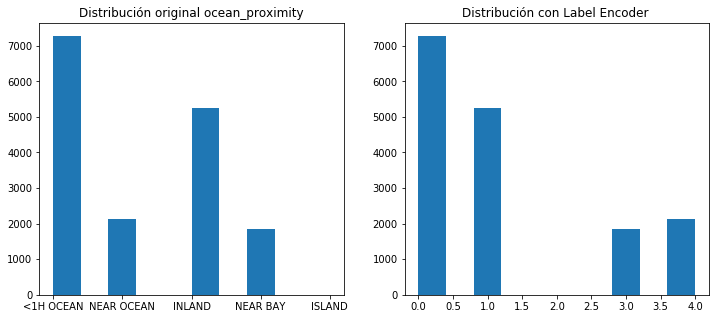

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['ocean_proximity'])
ax1.title.set_text('Distribución original ocean_proximity')
ax2.hist(housing1['ocean_proximity_LE'])
ax2.title.set_text('Distribución con Label Encoder ')
plt.show()

## Segunda transformación

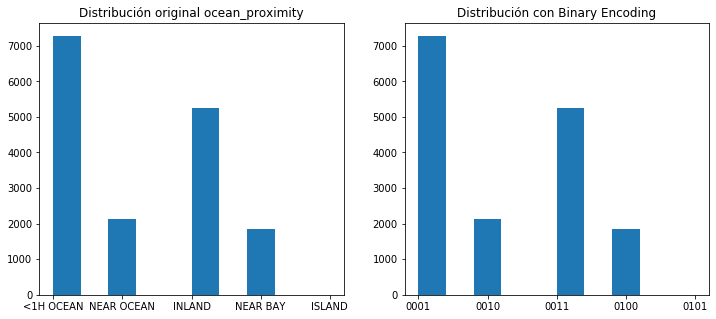

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['ocean_proximity'])
ax1.title.set_text('Distribución original ocean_proximity')

df = housing2['ocean_proximity_0'].map(str) + housing2['ocean_proximity_1'].map(str) + housing2['ocean_proximity_2'].map(str) + housing2['ocean_proximity_3'].map(str)

ax2.hist(df)
ax2.title.set_text('Distribución con Binary Encoding')
plt.show()

## Tercera transformación

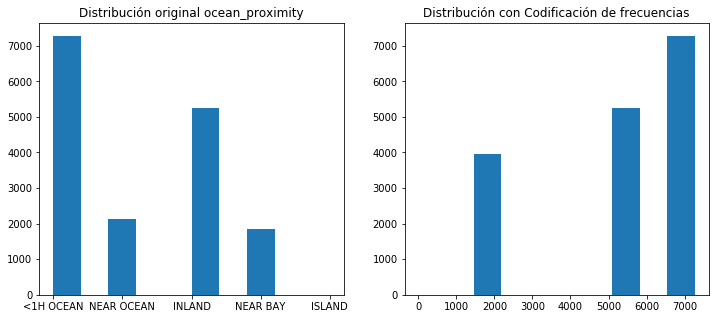

In [92]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['ocean_proximity'])
ax1.title.set_text('Distribución original ocean_proximity')
ax2.hist(housing3['ocean_proximity_fe'])
ax2.title.set_text('Distribución con Codificación de frecuencias')
plt.show()

## Cuarta transformacion

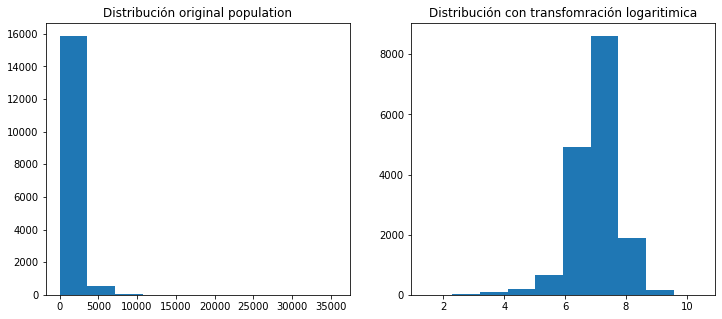

In [93]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['population'])
ax1.title.set_text('Distribución original population')
ax2.hist(housing4['population_log'])
ax2.title.set_text('Distribución con transfomración logaritimica')
plt.show()

## Quinta transformación

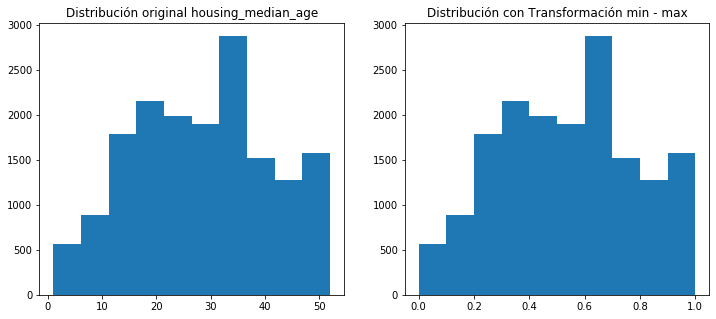

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['housing_median_age'])
ax1.title.set_text('Distribución original housing_median_age')
ax2.hist(housing5['housing_median_age_min_max'])
ax2.title.set_text('Distribución con Transformación min - max')
plt.show()

## Sexta tranformación

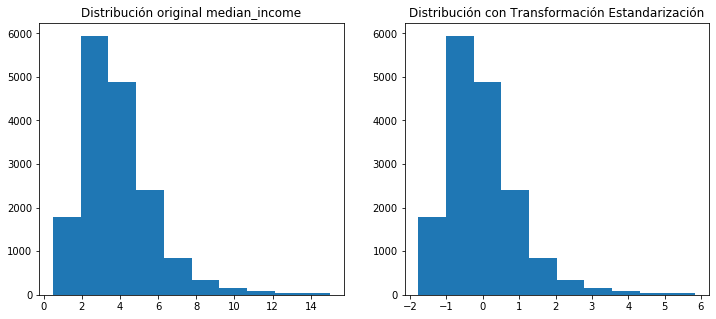

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['median_income'])
ax1.title.set_text('Distribución original median_income')
ax2.hist(housing6['median_income_est'])
ax2.title.set_text('Distribución con Transformación Estandarización')
plt.show()